# Problem 1

In [14]:
import numpy as np

def fft(x):
    n = x.size
    assert n & (n - 1) == 0, "size of vector should be power of 2"
    w = np.exp(-2 * np.pi * 1j / n * np.arange(n >> 1))
    
    def fft(i, n, s):
        if n == 1:
            return x[i]
        n >>= 1
        left = fft(i, n, s << 1)
        right = fft(i + s, n, s << 1)
        right *= w[::s]
        return np.append(left + right, left - right)
    
    return fft(0, n, 1)

In [19]:
x = np.random.rand(1 << 20)
res1 = %timeit -o np.fft.fft(x)
res2 = %timeit -o fft(x)
print res2.best/res1.best

10 loops, best of 3: 25.3 ms per loop
1 loops, best of 3: 15.9 s per loop
627.072255714


The slowest run took 19.99 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 9.26 µs per loop
The slowest run took 5.00 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 8.02 µs per loop
The slowest run took 6.91 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 9.42 µs per loop
The slowest run took 5.22 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 26.6 µs per loop
The slowest run took 7.49 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 9.07 µs per loop
10000 loops, best of 3: 52.9 µs per loop
The slowest run took 6.95 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 9.05 µs per loop

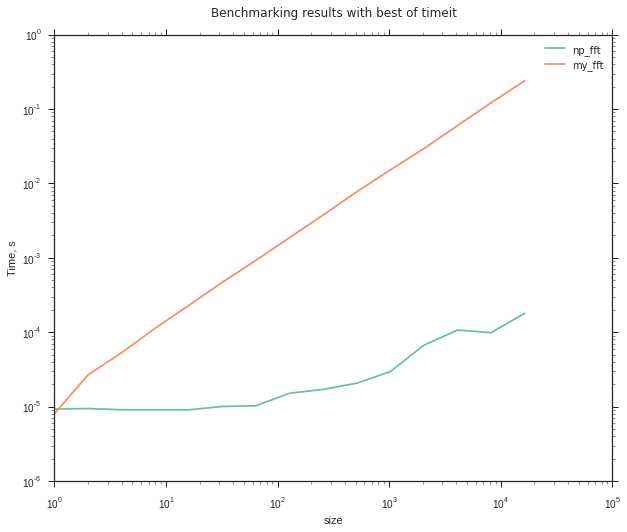

In [21]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

def plot_results(sizes, all_values):
    plt.figure(figsize=(10,8))
    
    for bench_name, values in all_values.iteritems():
        plt.loglog(sizes, values, label=bench_name)
        slope, intercept=np.polyfit(np.log(sizes[-5:]), np.log(values[-5:]), 1)
        print bench_name, 'slope', slope, 'intercept', intercept, '\n' 
    
    plt.legend(loc='best')
    plt.title('Benchmarking results with best of timeit', y=1.03)
    plt.xlabel('size')
    plt.ylabel('Time, s')
    
points = [1 << (i) for i in range(1)]
my_fft = []
np_fft = []

for i in points:
    x = np.random.rand(i)
    res = %timeit -o np.fft.fft(x)
    np_fft.append(res.best)
    res = %timeit -o fft(x)
    my_fft.append(res.best)
    
plot_results(points, {'my_fft': my_fft, 'np_fft': np_fft})

# Problem 2

In [37]:
def strassen(A, B):
    
    n = A.shape[0]
    def strassen(A, B, n):
        if n == 1:
            return A * B
        n >>= 1
        a11 = A[:n, :n]
        a12 = A[:n, n:]
        a21 = A[n:, :n]
        a22 = A[n:, n:]
        b11 = B[:n, :n]
        b12 = B[:n, n:]
        b21 = B[n:, :n]
        b22 = B[n:, n:]
        f1 = strassen(a11 + a22, b11 + b22, n)
        f2 = strassen(a21 + a22, b11, n)
        f3 = strassen(a11, b12 - b22, n)
        f4 = strassen(a22, b21 - b11, n)
        f5 = strassen(a11 + a12, b22, n)
        f6 = strassen(a21 - a11, b11 + b12, n)
        f7 = strassen(a12 - a22, b21 + b22, n)
        c11 = f1 + f4 - f5 + f7
        c12 = f3 + f5
        c21 = f2 + f4
        c22 = f1 - f2 + f3 + f6
        return np.append(np.append(c11, c12, axis = 1), np.append(c21, c22, axis = 1), axis = 0)
    
    return strassen(A, B, n)

A = np.random.rand(1 << 5, 1 << 5)
B = np.random.rand(1 << 5, 1 << 5)
print np.linalg.norm(A.dot(B) - strassen(A, B))

3.830994712e-13


# Problem 4

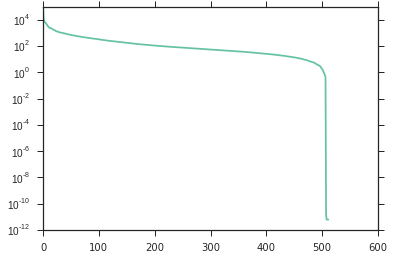

In [65]:
from scipy import misc
lena = misc.lena()
U, s, V = np.linalg.svd(lena)
plt.semilogy(s)

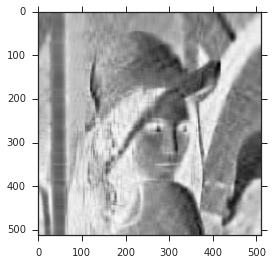

In [73]:
r = 20
U1 = U[:, :r]
s1 = s[:r]
V1 = V[:r, :]
# plt.imshow(lena)
plt.imshow(U1.dot(np.diag(s1).dot(V1)))